# About
Contingency table and chi-quare analysis of restaurants in Team 7 dataset.

In [50]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import pingouin
import numpy as np

# Load dataset

In [3]:
restaurant_df = pd.read_json('yelp_team7_dataset_restaurant.json')

In [4]:
restaurant_df.shape

(14970, 14)

In [5]:
categories_df = pd.read_json('yelp_team7_dataset_category.json')
categories_df.shape

(14891, 6)

In [6]:
restaurant_df = restaurant_df.merge(categories_df, on = 'business_id', how = 'left')

In [7]:
restaurant_df.shape

(14970, 19)

# Preliminary context

In [8]:
# How many restaurants were open?
restaurant_df.is_open.value_counts(dropna = False)

1    8376
0    6594
Name: is_open, dtype: int64

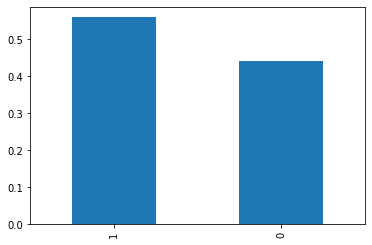

In [9]:
restaurant_df.is_open.value_counts(normalize = True).plot(kind = 'bar')
plt.show()

# Does restaurant survival in our sample depend on city?

In [10]:
city_contingency_table = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['city'])
city_contingency_table

city,ATLANTA,AUSTIN,BOSTON,ORLANDO,PORTLAND
is_open,,,,,
0,1406,1456,1034,978,1720
1,1790,1612,1331,1732,1911


Text(0.5, 1.0, 'Restaurant survival status vs. City (counts)')

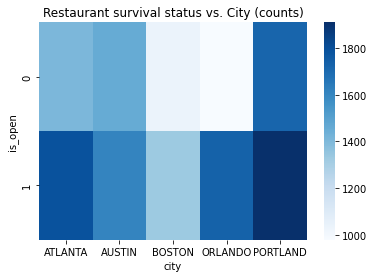

In [9]:
ax = sns.heatmap(city_contingency_table, cmap="Blues")
ax.set_title("Restaurant survival status vs. City (counts)")

In [44]:
city_contingency_norm_columns = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['city'],
                                          normalize = 'columns') * 100
city_contingency_norm_columns

city,ATLANTA,AUSTIN,BOSTON,ORLANDO,PORTLAND
is_open,,,,,
0,43.992491,47.457627,43.72093,36.088561,47.369871
1,56.007509,52.542373,56.27907,63.911439,52.630129


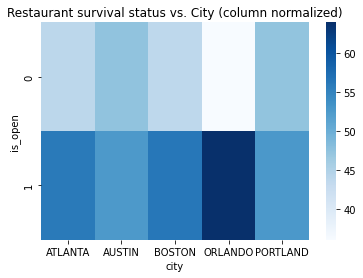

In [45]:
ax = sns.heatmap(city_contingency_norm_columns, cmap="Blues")
ax.set_title("Restaurant survival status vs. City (column normalized)")
#plt.show()
plt.savefig('heatmap_city_col.png', bbox_inches='tight')

In [46]:
city_contingency_norm_index = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['city'],
                                          normalize = 'index') * 100
city_contingency_norm_index

city,ATLANTA,AUSTIN,BOSTON,ORLANDO,PORTLAND
is_open,,,,,
0,21.322414,22.080679,15.680922,14.831665,26.084319
1,21.370583,19.245463,15.890640,20.678128,22.815186


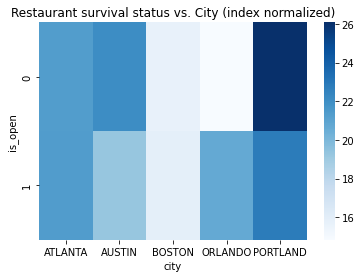

In [47]:
ax = sns.heatmap(city_contingency_norm_index, cmap="Blues")
ax.set_title("Restaurant survival status vs. City (index normalized)")
#plt.show()
plt.savefig('heatmap_city_index.png', bbox_inches='tight')

$H_0 : $ `is_open` is independent of `city`

$H_1$ : `is_open` is not independent of `city`

In [14]:
# chi-square test
round(chi2_contingency(city_contingency_table)[1],2)

0.0

Reject the null hypothesis. Restaurant survival status is not independent of city. 

# Does restaurant survival depend on cuisine type?

In [11]:
cuisine_contingency_table = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['cuisine_type'])
cuisine_contingency_table

cuisine_type,African,American,Caribean,Chinese,Italian,Japanese,Mexican,Middle Eastern,Other,Other Asian,Other European,Other Latin American,Other Mediterranean,Tex-Mex,Thai,Vietnamese
is_open,,,,,,,,,,,,,,,,
0,35,1676,93,283,501,242,440,66,0,321,191,155,204,94,161,129
1,54,2246,130,420,593,367,644,73,5,405,180,231,224,125,189,160


Very few observations in `Other`, which will influence later analyses by normalization. Combine `Other` with `Other Asian`

In [25]:
restaurant_df.cuisine_type.value_counts(dropna = False)

NaN                     4333
American                3922
Italian                 1094
Mexican                 1084
Other Asian              726
Chinese                  703
Japanese                 609
Other Mediterranean      428
Other Latin American     386
Other European           371
Thai                     350
Vietnamese               289
Caribean                 223
Tex-Mex                  219
Middle Eastern           139
African                   89
Other                      5
Name: cuisine_type, dtype: int64

In [30]:
cuisines_to_combine = ['Other', 'Other Asian']
condition = restaurant_df['cuisine_type'].isin(cuisines_to_combine)

In [31]:
restaurant_df.loc[condition, 'cuisine_type'] = 'Other Asian and Australian'

In [32]:
restaurant_df.cuisine_type.value_counts(dropna = False)

NaN                           4333
American                      3922
Italian                       1094
Mexican                       1084
Other Asian and Australian     731
Chinese                        703
Japanese                       609
Other Mediterranean            428
Other Latin American           386
Other European                 371
Thai                           350
Vietnamese                     289
Caribean                       223
Tex-Mex                        219
Middle Eastern                 139
African                         89
Name: cuisine_type, dtype: int64

In [33]:
cuisine_contingency_table = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['cuisine_type'])
cuisine_contingency_table

cuisine_type,African,American,Caribean,Chinese,Italian,Japanese,Mexican,Middle Eastern,Other Asian and Australian,Other European,Other Latin American,Other Mediterranean,Tex-Mex,Thai,Vietnamese
is_open,,,,,,,,,,,,,,,
0,35,1676,93,283,501,242,440,66,321,191,155,204,94,161,129
1,54,2246,130,420,593,367,644,73,410,180,231,224,125,189,160


Text(0.5, 1.0, 'Restaurant survival status vs. Cuisine (counts)')

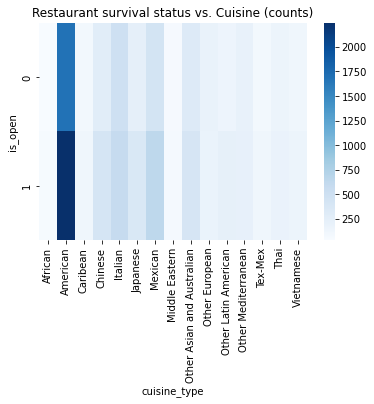

In [34]:
ax = sns.heatmap(cuisine_contingency_table, cmap="Blues")
ax.set_title("Restaurant survival status vs. Cuisine (counts)")

In [35]:
cuisine_contingency_norm_columns = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['cuisine_type'],
                                          normalize = 'columns') * 100
cuisine_contingency_norm_columns

cuisine_type,African,American,Caribean,Chinese,Italian,Japanese,Mexican,Middle Eastern,Other Asian and Australian,Other European,Other Latin American,Other Mediterranean,Tex-Mex,Thai,Vietnamese
is_open,,,,,,,,,,,,,,,
0,39.325843,42.733299,41.704036,40.256046,45.795247,39.737274,40.590406,47.482014,43.912449,51.48248,40.15544,47.663551,42.922374,46.0,44.636678
1,60.674157,57.266701,58.295964,59.743954,54.204753,60.262726,59.409594,52.517986,56.087551,48.51752,59.84456,52.336449,57.077626,54.0,55.363322


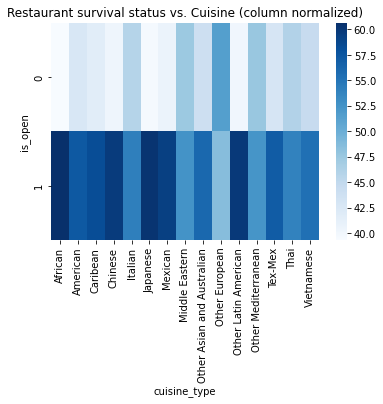

In [40]:
ax = sns.heatmap(cuisine_contingency_norm_columns, cmap="Blues")
ax.set_title("Restaurant survival status vs. Cuisine (column normalized)")
#plt.show()
plt.savefig('heatmap_cuisine_col.png', bbox_inches='tight')

In [37]:
cuisine_contingency_norm_index = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['cuisine_type'],
                                          normalize = 'index') * 100
cuisine_contingency_norm_index

cuisine_type,African,American,Caribean,Chinese,Italian,Japanese,Mexican,Middle Eastern,Other Asian and Australian,Other European,Other Latin American,Other Mediterranean,Tex-Mex,Thai,Vietnamese
is_open,,,,,,,,,,,,,,,
0,0.762361,36.506208,2.025702,6.164234,10.912655,5.271183,9.583969,1.437595,6.991941,4.160314,3.376171,4.443476,2.047484,3.506861,2.809845
1,0.893152,37.148528,2.150182,6.946742,9.808138,6.070129,10.651671,1.207410,6.781343,2.977175,3.820708,3.704929,2.067483,3.126034,2.646378


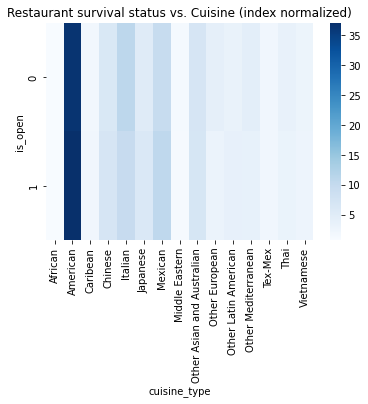

In [42]:
ax = sns.heatmap(cuisine_contingency_norm_index, cmap="Blues")
ax.set_title("Restaurant survival status vs. Cuisine (index normalized)")
#plt.show()
plt.savefig('heatmap_cuisine_index.png', bbox_inches='tight')

$H_0 : $ `is_open` is independent of `cuisine_type`

$H_1$ : `is_open` is not independent of `cuisine_type`

In [22]:
# chi-square test
round(chi2_contingency(cuisine_contingency_table)[1],2)

0.0

Reject the null hypothesis that restaurant survival status is independent of cuisine type. 

# Does restaurant survival depend on food type?

In [23]:
food_contingency_table = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['food_type'])
food_contingency_table

food_type,Alcoholic drinks,Bakeries,Barbeque,Breakfast & Brunch,Burgers,Chicken Wings,Coffee & Tea,Desserts,Juice Bars & Smoothies,Noodles related,Other food,Pizza,Salad,Sandwiches & Wraps,Seafood,Soup,Steakhouses
is_open,,,,,,,,,,,,,,,,,
0,124,177,172,433,291,82,328,198,40,50,207,498,122,505,263,35,115
1,142,271,207,711,317,224,429,279,100,141,401,682,263,579,455,104,165


Text(0.5, 1.0, 'Restaurant survival status vs. Food type (counts)')

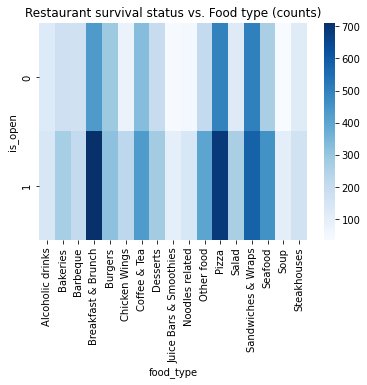

In [24]:
ax = sns.heatmap(food_contingency_table, cmap="Blues")
ax.set_title("Restaurant survival status vs. Food type (counts)")

In [26]:
food_contingency_norm_columns = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['food_type'],
                                          normalize = 'columns') * 100
food_contingency_norm_columns

food_type,Alcoholic drinks,Bakeries,Barbeque,Breakfast & Brunch,Burgers,Chicken Wings,Coffee & Tea,Desserts,Juice Bars & Smoothies,Noodles related,Other food,Pizza,Salad,Sandwiches & Wraps,Seafood,Soup,Steakhouses
is_open,,,,,,,,,,,,,,,,,
0,46.616541,39.508929,45.382586,37.84965,47.861842,26.797386,43.32893,41.509434,28.571429,26.17801,34.046053,42.20339,31.688312,46.586716,36.629526,25.179856,41.071429
1,53.383459,60.491071,54.617414,62.15035,52.138158,73.202614,56.67107,58.490566,71.428571,73.82199,65.953947,57.79661,68.311688,53.413284,63.370474,74.820144,58.928571


Text(0.5, 1.0, 'Restaurant survival status vs. Food type (normalize by Food type)')

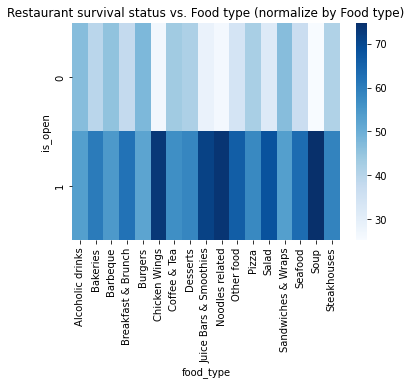

In [27]:
ax = sns.heatmap(food_contingency_norm_columns, cmap="Blues")
ax.set_title("Restaurant survival status vs. Food type (normalize by Food type)")

In [28]:
food_contingency_norm_index = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['food_type'],
                                          normalize = 'index') * 100
food_contingency_norm_index

food_type,Alcoholic drinks,Bakeries,Barbeque,Breakfast & Brunch,Burgers,Chicken Wings,Coffee & Tea,Desserts,Juice Bars & Smoothies,Noodles related,Other food,Pizza,Salad,Sandwiches & Wraps,Seafood,Soup,Steakhouses
is_open,,,,,,,,,,,,,,,,,
0,3.406593,4.862637,4.725275,11.895604,7.994505,2.252747,9.010989,5.439560,1.098901,1.373626,5.686813,13.681319,3.351648,13.873626,7.225275,0.961538,3.159341
1,2.595978,4.954296,3.784278,12.998172,5.795247,4.095064,7.842779,5.100548,1.828154,2.577697,7.330896,12.468007,4.808044,10.585009,8.318099,1.901280,3.016453


Text(0.5, 1.0, 'Restaurant survival status vs. Food type (normalize by survival status)')

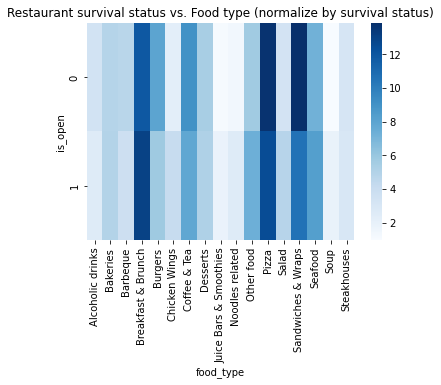

In [29]:
ax = sns.heatmap(food_contingency_norm_index, cmap="Blues")
ax.set_title("Restaurant survival status vs. Food type (normalize by survival status)")

$H_0 : $ `is_open` is independent of `food_type`

$H_1$ : `is_open` is not independent of `food_type`

In [30]:
# chi-square test
round(chi2_contingency(food_contingency_table)[1],2)

0.0

Reject the null hypothesis that restaurant survival status is independent of cuisine type. 

# Does restaurant survival depend on atmosphere type?

In [31]:
columns = ['business_id', 'is_open', 'cuisine_type', 'atmosphere_type', 'food_type', 'dietary_type', 'hi_transmission_risk']
subset_df = restaurant_df[columns]

In [32]:
#subset_df.loc[subset_df.atmosphere_type.isna(), 'atmosphere_type'] = 'unidentified'

In [33]:
#subset_df.atmosphere_type.value_counts()

In [34]:
atmosphere_contingency_table = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['atmosphere_type'])
atmosphere_contingency_table

atmosphere_type,Bars related,Brewery and beer garden related,Buffets,Cafes related,Delis,Diners and cafeteria related,Pubs related
is_open,,,,,,,
0,1408,33,82,319,173,113,112
1,2240,64,104,526,198,206,170


Text(0.5, 1.0, 'Restaurant survival status vs. Atmosphere type (counts)')

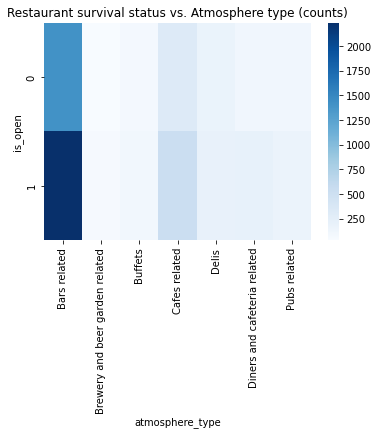

In [35]:
ax = sns.heatmap(atmosphere_contingency_table, cmap="Blues")
ax.set_title("Restaurant survival status vs. Atmosphere type (counts)")

In [36]:
atmosphere_contingency_norm_columns = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['atmosphere_type'],
                                          normalize = 'columns') * 100
atmosphere_contingency_norm_columns

atmosphere_type,Bars related,Brewery and beer garden related,Buffets,Cafes related,Delis,Diners and cafeteria related,Pubs related
is_open,,,,,,,
0,38.596491,34.020619,44.086022,37.751479,46.630728,35.423197,39.716312
1,61.403509,65.979381,55.913978,62.248521,53.369272,64.576803,60.283688


Text(0.5, 1.0, 'Restaurant survival status vs. Atmosphere type (normalize by Atmosphere type)')

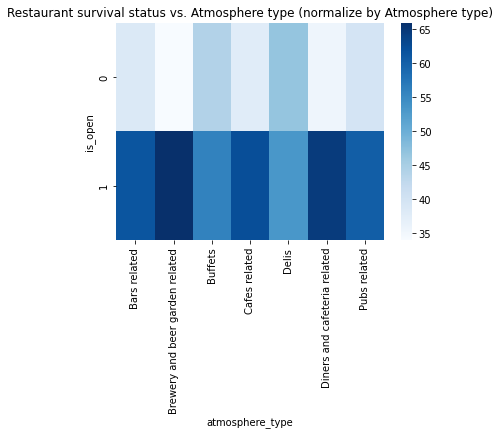

In [37]:
ax = sns.heatmap(atmosphere_contingency_norm_columns, cmap="Blues")
ax.set_title("Restaurant survival status vs. Atmosphere type (normalize by Atmosphere type)")

In [38]:
atmosphere_contingency_norm_index = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['atmosphere_type'],
                                          normalize = 'index') * 100
atmosphere_contingency_norm_index

atmosphere_type,Bars related,Brewery and beer garden related,Buffets,Cafes related,Delis,Diners and cafeteria related,Pubs related
is_open,,,,,,,
0,62.857143,1.473214,3.660714,14.241071,7.723214,5.044643,5.000000
1,63.854048,1.824401,2.964652,14.994299,5.644242,5.872292,4.846066


Text(0.5, 1.0, 'Restaurant survival status vs. Atmosphere type (normalize by survival status)')

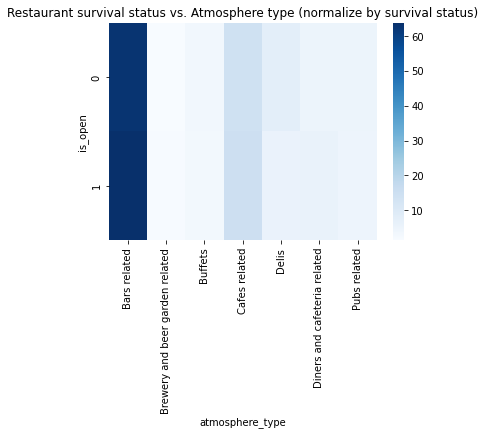

In [39]:
ax = sns.heatmap(atmosphere_contingency_norm_index, cmap="Blues")
ax.set_title("Restaurant survival status vs. Atmosphere type (normalize by survival status)")

$H_0 : $ `is_open` is independent of `atmosphere_type`

$H_1$ : `is_open` is not independent of `atmosphere_type`

In [40]:
# chi-square test
round(chi2_contingency(atmosphere_contingency_table)[1],2)

0.02

If we were to analyze restaurants that have atmosphere type identified, we get p-value of 0.02. Thus at $\alpha = 0.01$, we do not have sufficient evidence to reject the null hypothesis that is survival status is independent of atmosphere type. If we are willing to increase the type-I error to 0.05, we reject the null hypothesis.

# Does restaurant survival depend on its risk of covid tranmission?

## Using trasmission risk category

In [41]:
subset_df.hi_transmission_risk.value_counts(dropna = False)

NaN                          10192
Bars related                  2404
Nightlife                     1230
Event Planning & Services      438
Pubs related                   252
Buffets                        190
Lounges                        125
Venues & Event Spaces           54
Arts & Entertainment            46
Music Venues                    39
Name: hi_transmission_risk, dtype: int64

In [43]:
subset_df.loc[subset_df.hi_transmission_risk.isna(), 'hi_transmission_risk'] = 'Category of Low Transmission Risk'

In [44]:
subset_df.hi_transmission_risk.value_counts()

Category of Low Transmission Risk    10192
Bars related                          2404
Nightlife                             1230
Event Planning & Services              438
Pubs related                           252
Buffets                                190
Lounges                                125
Venues & Event Spaces                   54
Arts & Entertainment                    46
Music Venues                            39
Name: hi_transmission_risk, dtype: int64

In [45]:
transmission_contingency_table = pd.crosstab(index=subset_df['is_open'], columns=subset_df['hi_transmission_risk'])
transmission_contingency_table

hi_transmission_risk,Arts & Entertainment,Bars related,Buffets,Category of Low Transmission Risk,Event Planning & Services,Lounges,Music Venues,Nightlife,Pubs related,Venues & Event Spaces
is_open,,,,,,,,,,
0,24,919,84,4744,151,68,20,466,95,23
1,22,1485,106,5448,287,57,19,764,157,31


Text(0.5, 1.0, 'Restaurant survival status vs. Transmission risk (counts)')

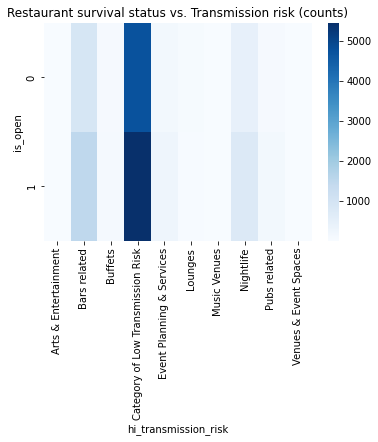

In [46]:
ax = sns.heatmap(transmission_contingency_table, cmap="Blues")
ax.set_title("Restaurant survival status vs. Transmission risk (counts)")

In [47]:
transmission_contingency_norm_columns = pd.crosstab(index=subset_df['is_open'], columns=subset_df['hi_transmission_risk'],
                                          normalize = 'columns') * 100
transmission_contingency_norm_columns

hi_transmission_risk,Arts & Entertainment,Bars related,Buffets,Category of Low Transmission Risk,Event Planning & Services,Lounges,Music Venues,Nightlife,Pubs related,Venues & Event Spaces
is_open,,,,,,,,,,
0,52.173913,38.227953,44.210526,46.546311,34.474886,54.4,51.282051,37.886179,37.698413,42.592593
1,47.826087,61.772047,55.789474,53.453689,65.525114,45.6,48.717949,62.113821,62.301587,57.407407


Text(0.5, 1.0, 'Restaurant survival status vs. Transmission risk (normalize by Transmission risk)')

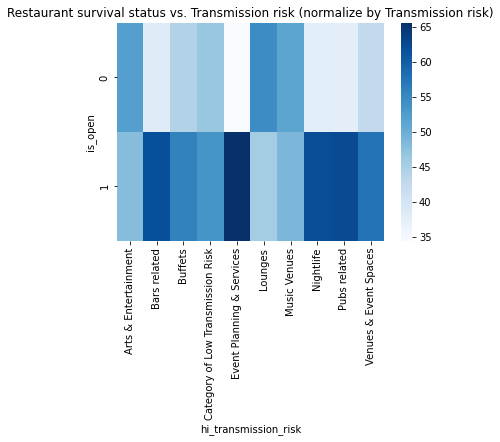

In [48]:
ax = sns.heatmap(transmission_contingency_norm_columns, cmap="Blues")
ax.set_title("Restaurant survival status vs. Transmission risk (normalize by Transmission risk)")

In [49]:
transmission_contingency_norm_index = pd.crosstab(index=subset_df['is_open'], columns=subset_df['hi_transmission_risk'],
                                          normalize = 'index') * 100
transmission_contingency_norm_index

hi_transmission_risk,Arts & Entertainment,Bars related,Buffets,Category of Low Transmission Risk,Event Planning & Services,Lounges,Music Venues,Nightlife,Pubs related,Venues & Event Spaces
is_open,,,,,,,,,,
0,0.363967,13.936912,1.273885,71.944192,2.289961,1.031241,0.303306,7.067031,1.440704,0.348802
1,0.262655,17.729226,1.265521,65.042980,3.426457,0.680516,0.226839,9.121299,1.874403,0.370105


Text(0.5, 1.0, 'Restaurant survival status vs. Transmission risk (normalize by survival status)')

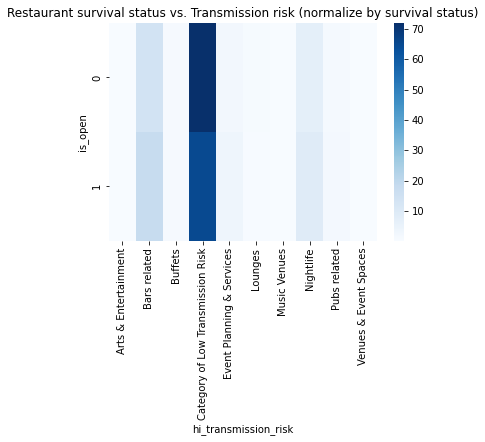

In [74]:
ax = sns.heatmap(transmission_contingency_norm_index, cmap="Blues")
ax.set_title("Restaurant survival status vs. Transmission risk (normalize by survival status)")

In [50]:
# chi-square test
round(chi2_contingency(transmission_contingency_table)[1],2)

0.0

In [53]:
# create an indicator column
subset_df.loc[subset_df['hi_transmission_risk'] == 'Category of Low Transmission Risk', 'transmission_risk'] = 'Low risk'
subset_df.loc[subset_df['hi_transmission_risk'] != 'Category of Low Transmission Risk', 'transmission_risk'] = 'High risk'

In [54]:
subset_df['transmission_risk'].value_counts()

Low risk     10192
High risk     4778
Name: transmission_risk, dtype: int64

In [55]:
risk_contingency_table = pd.crosstab(index=subset_df['is_open'], columns=subset_df['transmission_risk'])
risk_contingency_table

transmission_risk,High risk,Low risk
is_open,,
0,1850,4744
1,2928,5448


Text(0.5, 1.0, 'Restaurant survival status vs. Transmission risk (counts)')

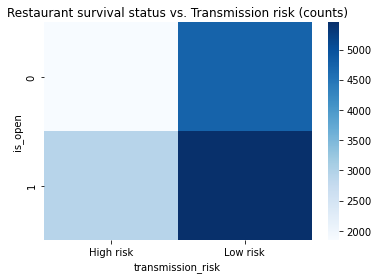

In [56]:
ax = sns.heatmap(risk_contingency_table, cmap="Blues")
ax.set_title("Restaurant survival status vs. Transmission risk (counts)")

In [57]:
risk_contingency_norm_columns = pd.crosstab(index=subset_df['is_open'], columns=subset_df['transmission_risk'],
                                          normalize = 'columns') * 100
risk_contingency_norm_columns

transmission_risk,High risk,Low risk
is_open,,
0,38.719129,46.546311
1,61.280871,53.453689


Text(0.5, 1.0, 'Restaurant survival status vs. Transmission risk (normalize by Transmission risk)')

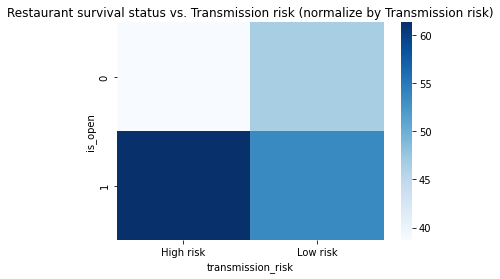

In [81]:
ax = sns.heatmap(risk_contingency_norm_columns, cmap="Blues")
ax.set_title("Restaurant survival status vs. Transmission risk (normalize by Transmission risk)")

In [58]:
risk_contingency_norm_index = pd.crosstab(index=subset_df['is_open'], columns=subset_df['transmission_risk'],
                                          normalize = 'index') * 100
risk_contingency_norm_index

transmission_risk,High risk,Low risk
is_open,,
0,28.055808,71.944192
1,34.957020,65.042980


Text(0.5, 1.0, 'Restaurant survival status vs. Transmission risk (normalize by survival status)')

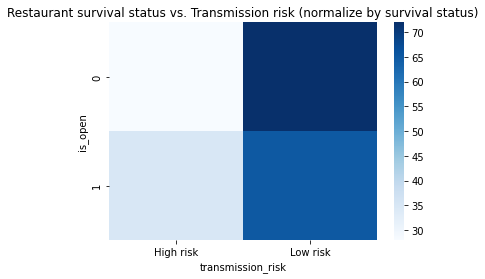

In [59]:
ax = sns.heatmap(risk_contingency_norm_index, cmap="Blues")
ax.set_title("Restaurant survival status vs. Transmission risk (normalize by survival status)")

$H_0 : $ `is_open` is independent of `transmission_risk`

$H_1$ : `is_open` is not independent of `transmission_risk`

In [60]:
# chi-square test
round(chi2_contingency(risk_contingency_table)[1],2)

0.0

Reject the null hypothesis that restaurant survival status is independent of the transmission risk of its categories.

## Using covid incidence

In [48]:
# load the covid rate file
covid_df = pd.read_csv('covid_incidence_by_city.csv')

In [51]:
median_incidence = np.median(covid_df.incidence)
covid_df.loc[covid_df.incidence <= median_incidence, 'risk'] = 'low'
covid_df.loc[covid_df.incidence > median_incidence, 'risk'] = 'high'

In [52]:
covid_df

,Unnamed: 0,FIPS,date,incidence,Name,State,city,risk
0,0,13121,2021-03-15,8355.945888,Fulton,GA,Atlanta,low
1,1,41051,2021-03-15,3989.272379,Multnomah,OR,Portland,low
2,2,12095,2021-03-15,8491.214624,Orange,FL,Orlando,high
3,3,25025,2021-03-15,10076.041134,Suffolk,MA,Boston,high
4,4,48453,2021-03-15,6096.687949,Travis,TX,Austin,low


In [53]:
cities_hi_covid_incidence = ['ORLANDO', 'BOSTON']

In [55]:
restaurant_df.city.isin(cities_hi_covid_incidence).value_counts()

False    9895
True     5075
Name: city, dtype: int64

In [56]:
restaurant_df.city.value_counts() #sanity check

PORTLAND    3631
ATLANTA     3196
AUSTIN      3068
ORLANDO     2710
BOSTON      2365
Name: city, dtype: int64

In [57]:
is_high_incidence = restaurant_df.city.isin(cities_hi_covid_incidence)
restaurant_df.loc[is_high_incidence, 'covid_incidence'] = 'High'
restaurant_df.loc[~is_high_incidence, 'covid_incidence'] = 'Low'

In [58]:
restaurant_df.covid_incidence.value_counts(dropna = False)

Low     9895
High    5075
Name: covid_incidence, dtype: int64

In [59]:
# create contingency table
covid_incidence_contingency_table = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['covid_incidence'])
covid_incidence_contingency_table

covid_incidence,High,Low
is_open,,
0,2012,4582
1,3063,5313


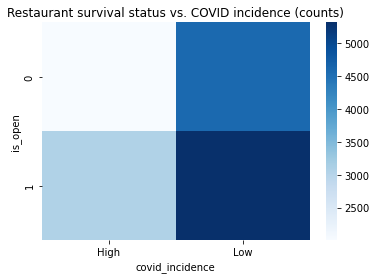

In [62]:
ax = sns.heatmap(covid_incidence_contingency_table, cmap="Blues")
ax.set_title("Restaurant survival status vs. COVID incidence (counts)")
plt.show()

In [60]:
covid_contingency_norm_columns = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['covid_incidence'],
                                          normalize = 'columns') * 100
covid_contingency_norm_columns

covid_incidence,High,Low
is_open,,
0,39.64532,46.306215
1,60.35468,53.693785


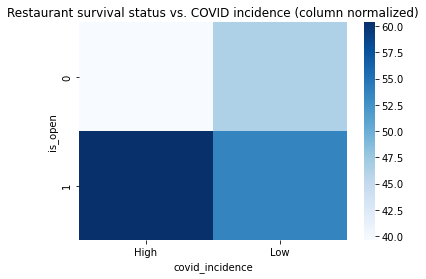

In [63]:
ax = sns.heatmap(covid_contingency_norm_columns, cmap="Blues")
ax.set_title("Restaurant survival status vs. COVID incidence (column normalized)")
plt.show()

In [64]:
covid_contingency_norm_index = pd.crosstab(index=restaurant_df['is_open'], columns=restaurant_df['covid_incidence'],
                                          normalize = 'index') * 100
covid_contingency_norm_index

covid_incidence,High,Low
is_open,,
0,30.512587,69.487413
1,36.568768,63.431232


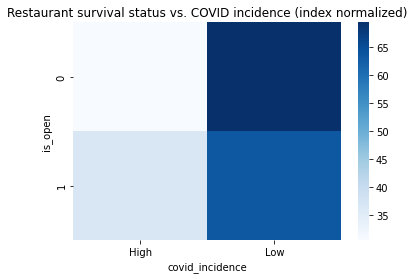

In [65]:
ax = sns.heatmap(covid_contingency_norm_index, cmap="Blues")
ax.set_title("Restaurant survival status vs. COVID incidence (index normalized)")
plt.show()

In [66]:
# chi-square test
round(chi2_contingency(covid_incidence_contingency_table)[1],2)

0.0